In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df = pd.DataFrame(data.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.columns = data.feature_names

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
data.target.shape

(150,)

In [16]:
df['Species'] = data.target

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [29]:
regressor = LinearRegression()

In [30]:
mse = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=5)
mse

array([-0.01134791, -0.03305573, -0.11754365, -0.05298791, -0.12991543])

In [31]:
mean_mse = np.mean(mse)
mean_mse

-0.06897012554624689

# Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [49]:
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [50]:
ridge_regressor.best_score_

-0.06897012554624668

In [51]:
ridge_regressor.best_params_

{'alpha': 1e-15}

# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [52]:
lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [53]:
lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [54]:
lasso_regressor.best_params_

{'alpha': 1e-15}

In [55]:
lasso_regressor.best_score_

-0.06897012554624679

# Predictions

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
pred_ridge = ridge_regressor.predict(X_test)
pred_ridge

array([ 2.0535133 ,  0.95071742, -0.15536734,  1.79046937, -0.04448632,
        2.24422636, -0.03329807,  1.30098933,  1.26376188,  1.09825476,
        1.5330279 ,  1.28482413,  1.19738107,  1.31252984,  1.31522353,
       -0.12510134,  1.34161032,  1.20394697,  0.03198734, -0.033167  ,
        1.78646464,  1.38236471,  0.06935286,  0.01983243,  1.57460622,
       -0.12206239,  0.14159972,  1.15164973,  0.8985638 ,  0.10022859,
        1.70025272,  1.40474588, -0.07087544,  1.60064541,  1.97884189,
        1.24103868, -0.03219801,  1.54773844,  1.28019945,  1.0789172 ,
        1.84227394, -0.04862768,  1.85746781,  0.21807105, -0.10127251])

In [64]:
pred_lasso = lasso_regressor.predict(X_test)
pred_lasso

array([ 2.0535133 ,  0.95071742, -0.15536734,  1.79046937, -0.04448632,
        2.24422636, -0.03329807,  1.30098933,  1.26376188,  1.09825476,
        1.5330279 ,  1.28482413,  1.19738107,  1.31252984,  1.31522353,
       -0.12510134,  1.34161032,  1.20394697,  0.03198734, -0.033167  ,
        1.78646464,  1.38236471,  0.06935286,  0.01983243,  1.57460622,
       -0.12206239,  0.14159972,  1.15164973,  0.8985638 ,  0.10022859,
        1.70025272,  1.40474588, -0.07087544,  1.60064541,  1.97884189,
        1.24103868, -0.03219801,  1.54773844,  1.28019945,  1.0789172 ,
        1.84227394, -0.04862768,  1.85746781,  0.21807105, -0.10127251])

In [57]:
import seaborn as sns

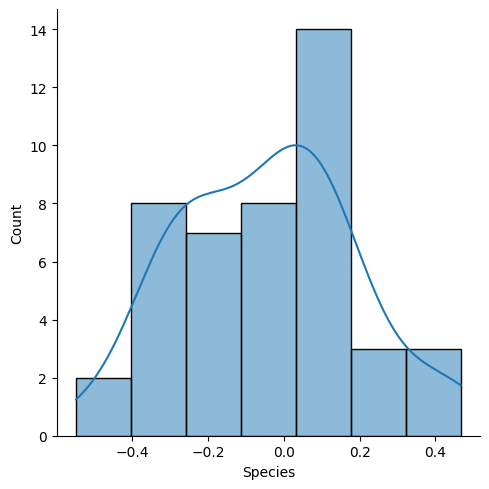

In [69]:
sns.displot(y_test-pred_ridge, kde=True)

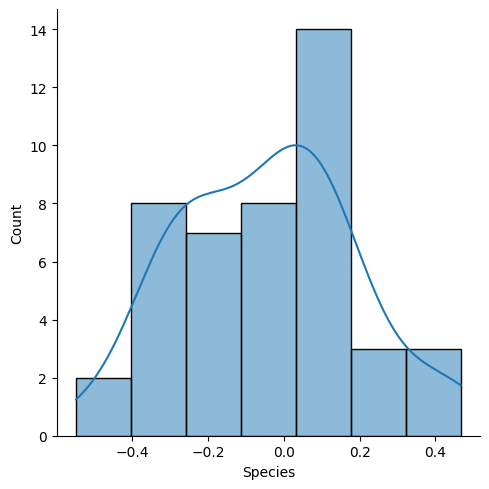

In [70]:
sns.displot(y_test - pred_lasso,kde=True)